In [ ]:
import torchvision
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
train_transforms=transforms.Compose([ transforms.RandomHorizontalFlip(),
                                   transforms.RandomRotation(10),
                                   transforms.ToTensor(),
                                   transforms.Normalize(torch.Tensor(mean),torch.Tensor(std)),
                                   transforms.Resize((224,224))])#different from 1st coding

In [ ]:
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
test_transforms=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize(torch.Tensor(mean),torch.Tensor(std)),
                                    transforms.Resize((224,224)) ])#different from 1st cooding

In [ ]:
test_path='/content/drive/MyDrive/Test Stem Cell'
train_path='/content/drive/MyDrive/Train Stem Cell'

In [ ]:
train_datasets=torchvision.datasets.ImageFolder(train_path,transform=train_transforms)
test_datasets=torchvision.datasets.ImageFolder(test_path,transform=test_transforms)
len(test_datasets)

56

In [ ]:
len(train_datasets)

340

In [ ]:
train_loader=torch.utils.data.DataLoader(train_datasets,batch_size=8,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_datasets,batch_size=2,shuffle=True)

In [ ]:
def show_transformed_images(dataset):
    loader=torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)
    batch=next(iter(loader))
    images,labels=batch
    grid=torchvision.utils.make_grid(images,nrows=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid,(1,2,0)))
    print('labels:',labels)

labels: tensor([2, 3, 0, 5])


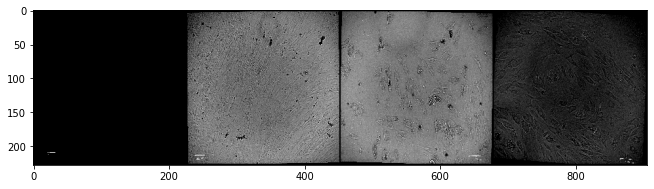

In [ ]:
show_transformed_images(train_datasets)

In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim


In [ ]:
resnet18_model=models.resnet18(pretrained=True)
num_ftrs=resnet18_model.fc.in_features #temporary variable that gets the number of input features 
number_of_classes=8 #number of class in my network/
resnet18_model.fc=nn.Linear(num_ftrs,number_of_classes)# number of input feature and number of output features
loss_fn=nn.CrossEntropyLoss()#Creterian
optimizer= optim.SGD(resnet18_model.parameters(),lr=0.01,momentum=0.9,weight_decay=0.003)
num_epochs=100






/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
def train_nn(model,train_loader,test_loader,criterion,optimizer,n_epoch):

  for epoch in range (num_epochs):
    print('Epoch number %d' %(epoch+1))
    model.train()
    running_loss=0.0
    running_correct=0.0
    total=0
    for data in train_loader:
      images,labels=data
      total += labels.size(0)#track the total amount of images
      optimizer.zero_grad()
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
      running_correct += (labels==predicted).sum().item()
    epoch_loss=running_loss/len(train_loader)
    epoch_acc=100*running_correct/total
    print(' -traning datasets. Got %d out of %d images correctly (%.3f%%). Epoch loss: %.3f' % (running_correct, total, epoch_acc, epoch_loss))
    evaluate_model_on_test_set(model,test_loader)
  print(finished)
  return model

In [ ]:
def evaluate_model_on_test_set(model,test_loader):
  model.eval()
  predicted_correctly_on_epoch=0;
  total=0
  with torch.no_grad():
    for data in test_loader:
      images,labels=data
      total +=labels.size(0)
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      predicted_correctly_on_epoch += (predicted==labels).sum().item()
  epoch_acc=100.0 * predicted_correctly_on_epoch / total
  print('-testing dataset. Got %d out of %d images correctly (%.3f%%)' %(predicted_correctly_on_epoch,total,epoch_acc))


In [ ]:
train_nn(resnet18_model,train_loader,test_loader,loss_fn,optimizer,num_epochs)